# Pandas Workout 

Dataframe information, selection basics, cleaning duplicates and missing values.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [268]:
dates = pd.date_range('20161230', periods=5000)
df = pd.DataFrame(np.random.randn(5000,4), index = dates) # generate random data 
df.columns = ['1','2','3','4'] # column names

## Dataframe info

In [269]:
df.head(7) # top 7 rows 

,1,2,3,4
2016-12-30,0.142736,1.587435,-0.470768,-0.264490
2016-12-31,-0.947466,-0.318280,1.489339,1.711540
2017-01-01,-0.273365,2.850541,-0.440963,-0.953034
2017-01-02,-0.702992,-0.606042,-1.237172,-1.110024
2017-01-03,0.234899,0.537560,2.056692,-0.220067
2017-01-04,-1.545589,-0.255547,2.196367,-0.449880
2017-01-05,-0.885425,-0.829987,0.663921,-0.860029


In [270]:
df.tail() # last 5 rows 

,1,2,3,4
2030-09-03,0.168550,0.255328,0.528528,-0.210682
2030-09-04,-1.121574,1.415819,0.219301,0.912417
2030-09-05,1.095828,1.447413,0.520759,1.370273
2030-09-06,0.428630,-1.888199,0.307174,-0.533083
2030-09-07,-0.883264,-0.801341,-0.800106,-1.913653


In [271]:
df.dtypes # data types 

1    float64
2    float64
3    float64
4    float64
dtype: object

In [272]:
df.info() # dataframe info

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2016-12-30 to 2030-09-07
Freq: D
Data columns (total 4 columns):
1    5000 non-null float64
2    5000 non-null float64
3    5000 non-null float64
4    5000 non-null float64
dtypes: float64(4)
memory usage: 195.3 KB


In [273]:
df.describe() # dataframe info: min max quartiles

,1,2,3,4
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.020007,-0.008597,-0.004172,-0.004837
std,0.980409,1.010684,1.000441,1.003846
min,-4.546355,-3.524416,-3.829275,-3.439241
25%,-0.667370,-0.690937,-0.689398,-0.684075
50%,-0.023557,0.003322,0.005939,-0.002368
75%,0.640891,0.670555,0.682409,0.693570
max,3.770940,3.966520,3.498627,3.838479


In [274]:
df.index # rows hearders

DatetimeIndex(['2016-12-30', '2016-12-31', '2017-01-01', '2017-01-02',
               '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-07', '2017-01-08',
               ...
               '2030-08-29', '2030-08-30', '2030-08-31', '2030-09-01',
               '2030-09-02', '2030-09-03', '2030-09-04', '2030-09-05',
               '2030-09-06', '2030-09-07'],
              dtype='datetime64[ns]', length=5000, freq='D')

In [275]:
df.columns # columns hearders

Index(['1', '2', '3', '4'], dtype='object')

In [276]:
df.values # dataframe values as numpy.ndarray

array([[ 0.14273565,  1.58743451, -0.47076799, -0.26448981],
       [-0.94746583, -0.3182799 ,  1.48933927,  1.71153971],
       [-0.27336509,  2.85054113, -0.44096325, -0.95303426],
       ..., 
       [ 1.09582805,  1.4474135 ,  0.52075855,  1.37027321],
       [ 0.42862988, -1.88819877,  0.30717398, -0.53308306],
       [-0.88326375, -0.80134111, -0.80010563, -1.91365304]])

In [277]:
df.shape #number of rows and columns

(5000, 4)

In [278]:
# second dataset  - diabetes data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
colNames = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header = None, names = colNames)

In [279]:
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [280]:
pima['pregnant'].value_counts() # number of values in 'pregnant' column

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64

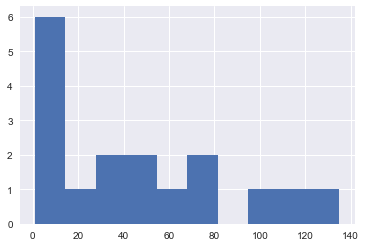

In [281]:
pima['pregnant'].value_counts().hist() # class distribution

In [282]:
pima['pregnant'].value_counts(normalize = True) # number of values in 'pregnant' column. Normalized (sum == 1)

1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: pregnant, dtype: float64

In [283]:
pima['pregnant'].value_counts(normalize = True).sum()

1.0

In [284]:
pima['pregnant'].nunique() # number of unique values in 'pregnant' column

17

In [285]:
pima['pregnant'].unique() # list of unique values in 'pregnant' column

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14], dtype=int64)

In [286]:
pd.crosstab(pima.pregnant, pima.label) # 'label' values vs 'pregnant' values 

label,0,1
pregnant,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


## Selection

### The .loc attribute is the primary access method

[Pandas link](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

The following are valid inputs:

* A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index. This use is not an integer position along the index)
* A list or array of labels ['a', 'b', 'c']
* A slice object with labels 'a':'f' (note that contrary to usual python slices, both the start and the stop are included!)
* A boolean array
* A callable, see Selection By Callable



In [287]:
df.loc[dates[0:5], ['1','3']] 

,1,3
2016-12-30,0.142736,-0.470768
2016-12-31,-0.947466,1.489339
2017-01-01,-0.273365,-0.440963
2017-01-02,-0.702992,-1.237172
2017-01-03,0.234899,2.056692


In [288]:
df.loc[dates[1:5], '1':'3'] 

,1,2,3
2016-12-31,-0.947466,-0.318280,1.489339
2017-01-01,-0.273365,2.850541,-0.440963
2017-01-02,-0.702992,-0.606042,-1.237172
2017-01-03,0.234899,0.537560,2.056692


### Boolean selection

In [289]:
df[df.iloc[:, 0] > 3] # select rows where column 1 value > 3 

,1,2,3,4
2020-11-11,3.513221,0.952917,1.746989,1.202303
2024-10-26,3.278373,0.020879,0.129187,0.107265
2028-07-19,3.770940,1.578024,0.522646,-1.449600


In [328]:
df[(df.iloc[:, 0] > 3) & (df.iloc[:, 2] < 2)] # select rows where column 1 value > 3 and column 3 value < 0

TypeError: invalid type comparison

### Purely integer based indexing

pandas provides a suite of methods in order to get purely integer based indexing. The semantics follow closely python and numpy slicing. These are 0-based indexing. When slicing, **the start bounds is included, while the upper bound is excluded**. Trying to use a non-integer, even a valid label will raise a IndexError.

The **.iloc** attribute is the primary access method. The following are valid inputs:

* An integer e.g. 5
* A list or array of integers [4, 3, 0]
* A slice object with ints 1:7
* A boolean array
* A callable, see Selection By Callable

In [291]:
df.iloc[0:3, 1:3]

,2,3
2016-12-30,1.587435,-0.470768
2016-12-31,-0.318280,1.489339
2017-01-01,2.850541,-0.440963


In [292]:
df.iloc[-7:, 1:3] # select last 7 rows in 2 columns

,2,3
2030-09-01,-0.105802,-1.745197
2030-09-02,1.175183,0.607129
2030-09-03,0.255328,0.528528
2030-09-04,1.415819,0.219301
2030-09-05,1.447413,0.520759
2030-09-06,-1.888199,0.307174
2030-09-07,-0.801341,-0.800106


In [293]:
df.ix[[0,3,5], [0,2,3]]

,1,3,4
2016-12-30,0.142736,-0.470768,-0.264490
2017-01-02,-0.702992,-1.237172,-1.110024
2017-01-04,-1.545589,2.196367,-0.449880


In [294]:
# One can use .iloc like that:
df.iloc[:2, 2] = 1.1123231
df.iloc[:2, 2]

2016-12-30    1.112323
2016-12-31    1.112323
Freq: D, Name: 3, dtype: float64

In [295]:
df.iloc[:5, 2:5]

,3,4
2016-12-30,1.112323,-0.264490
2016-12-31,1.112323,1.711540
2017-01-01,-0.440963,-0.953034
2017-01-02,-1.237172,-1.110024
2017-01-03,2.056692,-0.220067


### Using the isin() method for filtering:

In [296]:
df.iloc[0,2] = 5
df.iloc[:3, 0:3]

,1,2,3
2016-12-30,0.142736,1.587435,5.000000
2016-12-31,-0.947466,-0.318280,1.112323
2017-01-01,-0.273365,2.850541,-0.440963


In [297]:
df.iloc[:3, 0:3].isin([5])

,1,2,3
2016-12-30,False,False,True
2016-12-31,False,False,False
2017-01-01,False,False,False


## Duplicates

In [298]:
pima.pregnant.head(10) 

0     6
1     1
2     8
3     1
4     0
5     5
6     3
7    10
8     2
9     8
Name: pregnant, dtype: int64

In [299]:
pima.pregnant.duplicated().head(10) #check for duplicated cells

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9     True
Name: pregnant, dtype: bool

In [300]:
pima[pima.pregnant.duplicated()].head(10) # select duplicated cells (first 10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
3,1,89,66,23,94,28.1,0.167,21,0
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
17,7,107,74,0,0,29.6,0.254,31,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1


In [301]:
pima.pregnant.drop_duplicates() # drop duplicated cells 

0       6
1       1
2       8
4       0
5       5
6       3
7      10
8       2
10      4
15      7
23      9
24     11
28     13
88     15
159    17
215    12
298    14
Name: pregnant, dtype: int64

## Missing data

To make detecting missing values easier (across different array dtypes), pandas provides **isnull()** and **notnull()** functions, which are also methods on Series and DataFrame objects:

In [302]:
df.iloc[:5, 0:3] = np.nan

In [303]:
df.iloc[:6, 0:3].isnull() 

,1,2,3
2016-12-30,True,True,True
2016-12-31,True,True,True
2017-01-01,True,True,True
2017-01-02,True,True,True
2017-01-03,True,True,True
2017-01-04,False,False,False


The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here) are all written to account for missing data. For example:

* When summing data, NA (missing) values will be treated as zero
* If the data are all NA, the result will be NA
* Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [304]:
pima.isnull().any() # any null values?

pregnant    False
glucose     False
bp          False
skin        False
insulin     False
bmi         False
pedigree    False
age         False
label       False
dtype: bool

In [305]:
pima.notnull().head() # not null?

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True


In [306]:
df[:8].cumsum()

,1,2,3,4
2016-12-30,NaN,NaN,NaN,-0.264490
2016-12-31,NaN,NaN,NaN,1.447050
2017-01-01,NaN,NaN,NaN,0.494016
2017-01-02,NaN,NaN,NaN,-0.616008
2017-01-03,NaN,NaN,NaN,-0.836075
2017-01-04,-1.545589,-0.255547,2.196367,-1.285955
2017-01-05,-2.431014,-1.085534,2.860289,-2.145984
2017-01-06,-3.310103,-1.358787,2.746141,-3.173137


### Cleaning / filling missing data

The **fillna** function can “fill in” NA values with non-null data in a couple of ways, which we illustrate:

In [307]:
df.fillna(0)[:6] # Replace NAs with a scalar value

,1,2,3,4
2016-12-30,0.000000,0.000000,0.000000,-0.264490
2016-12-31,0.000000,0.000000,0.000000,1.711540
2017-01-01,0.000000,0.000000,0.000000,-0.953034
2017-01-02,0.000000,0.000000,0.000000,-1.110024
2017-01-03,0.000000,0.000000,0.000000,-0.220067
2017-01-04,-1.545589,-0.255547,2.196367,-0.449880


In [308]:
df.iloc[:5, 0:3] = np.nan 
df.fillna(df.mean()[1:3])[:7] # Filling NAs with means

,1,2,3,4
2016-12-30,NaN,-0.009417,-0.004456,-0.264490
2016-12-31,NaN,-0.009417,-0.004456,1.711540
2017-01-01,NaN,-0.009417,-0.004456,-0.953034
2017-01-02,NaN,-0.009417,-0.004456,-1.110024
2017-01-03,NaN,-0.009417,-0.004456,-0.220067
2017-01-04,-1.545589,-0.255547,2.196367,-0.449880
2017-01-05,-0.885425,-0.829987,0.663921,-0.860029


### Dropping missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use the **dropna** method:

In [309]:
df.dropna(axis=0).head() # drop rows with NAs

,1,2,3,4
2017-01-04,-1.545589,-0.255547,2.196367,-0.449880
2017-01-05,-0.885425,-0.829987,0.663921,-0.860029
2017-01-06,-0.879089,-0.273252,-0.114148,-1.027153
2017-01-07,0.429938,0.931786,0.751178,-0.556528
2017-01-08,0.038239,-1.620833,-0.957915,0.366602


### Interpolation

Both Series and Dataframe objects have an interpolate method that, by default, performs linear interpolation at missing datapoints.

In [310]:
df.iloc[0,0] = 21
df.head()

,1,2,3,4
2016-12-30,21.0,NaN,NaN,-0.264490
2016-12-31,NaN,NaN,NaN,1.711540
2017-01-01,NaN,NaN,NaN,-0.953034
2017-01-02,NaN,NaN,NaN,-1.110024
2017-01-03,NaN,NaN,NaN,-0.220067


In [311]:
df.iloc[:7, 0:1].interpolate().iloc[:7, 0:1]

,1
2016-12-30,21.000000
2016-12-31,16.490882
2017-01-01,11.981764
2017-01-02,7.472647
2017-01-03,2.963529
2017-01-04,-1.545589
2017-01-05,-0.885425


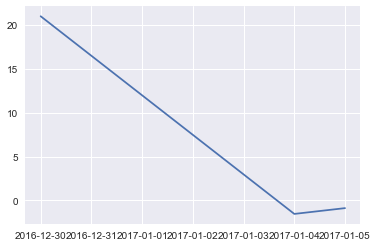

In [312]:
plt.plot(df.interpolate().iloc[:7, 0:1])

### String/Regular Expression Replacement

In [313]:
# Replace the ‘.’ with nan (str -> str)
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
df1 = pd.DataFrame(d)
df1.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


### Apply
Applying functions to the data

In [314]:
df = df.dropna(axis=0)
df.head(10)

,1,2,3,4
2017-01-04,-1.545589,-0.255547,2.196367,-0.449880
2017-01-05,-0.885425,-0.829987,0.663921,-0.860029
2017-01-06,-0.879089,-0.273252,-0.114148,-1.027153
2017-01-07,0.429938,0.931786,0.751178,-0.556528
2017-01-08,0.038239,-1.620833,-0.957915,0.366602
2017-01-09,-0.240794,-0.641350,-0.118116,0.655488
2017-01-10,0.941047,-0.141797,1.831860,-0.209593
2017-01-11,0.690889,1.399415,-0.887456,-0.022391
2017-01-12,0.958013,-0.235684,0.740738,-0.325478
2017-01-13,0.218308,-0.516635,1.613484,-0.533568


In [315]:
df.iloc[:, 1:3].apply(np.cumsum)[:10]

,2,3
2017-01-04,-0.255547,2.196367
2017-01-05,-1.085534,2.860289
2017-01-06,-1.358787,2.746141
2017-01-07,-0.427001,3.497319
2017-01-08,-2.047834,2.539404
2017-01-09,-2.689184,2.421288
2017-01-10,-2.830981,4.253148
2017-01-11,-1.431566,3.365692
2017-01-12,-1.667250,4.106429
2017-01-13,-2.183885,5.719913


### DataFrame visualisations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C0D47D6048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000C0D49756D8>]], dtype=object)

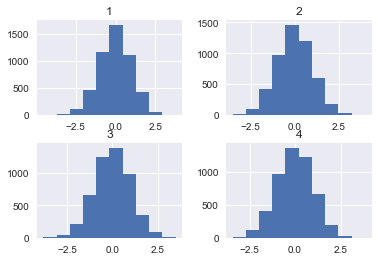

In [316]:
df.hist()

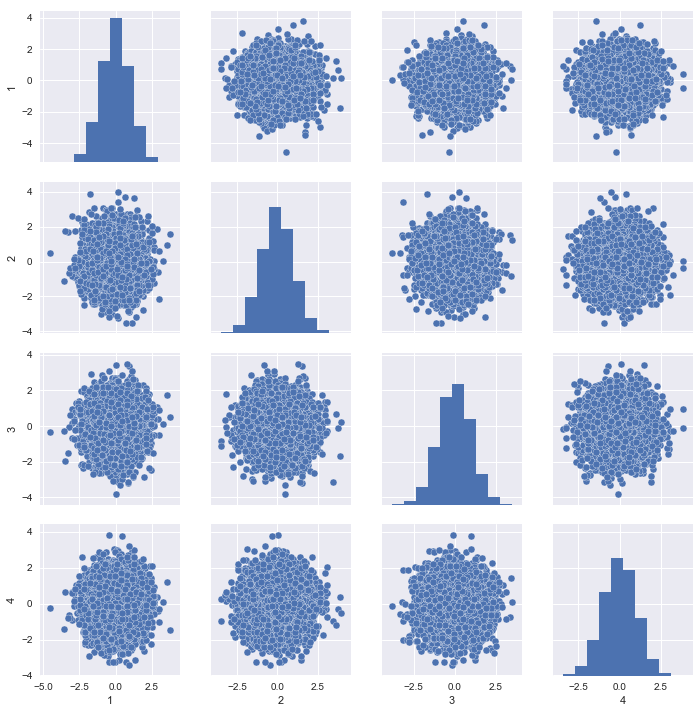

In [317]:
sns.pairplot(df)

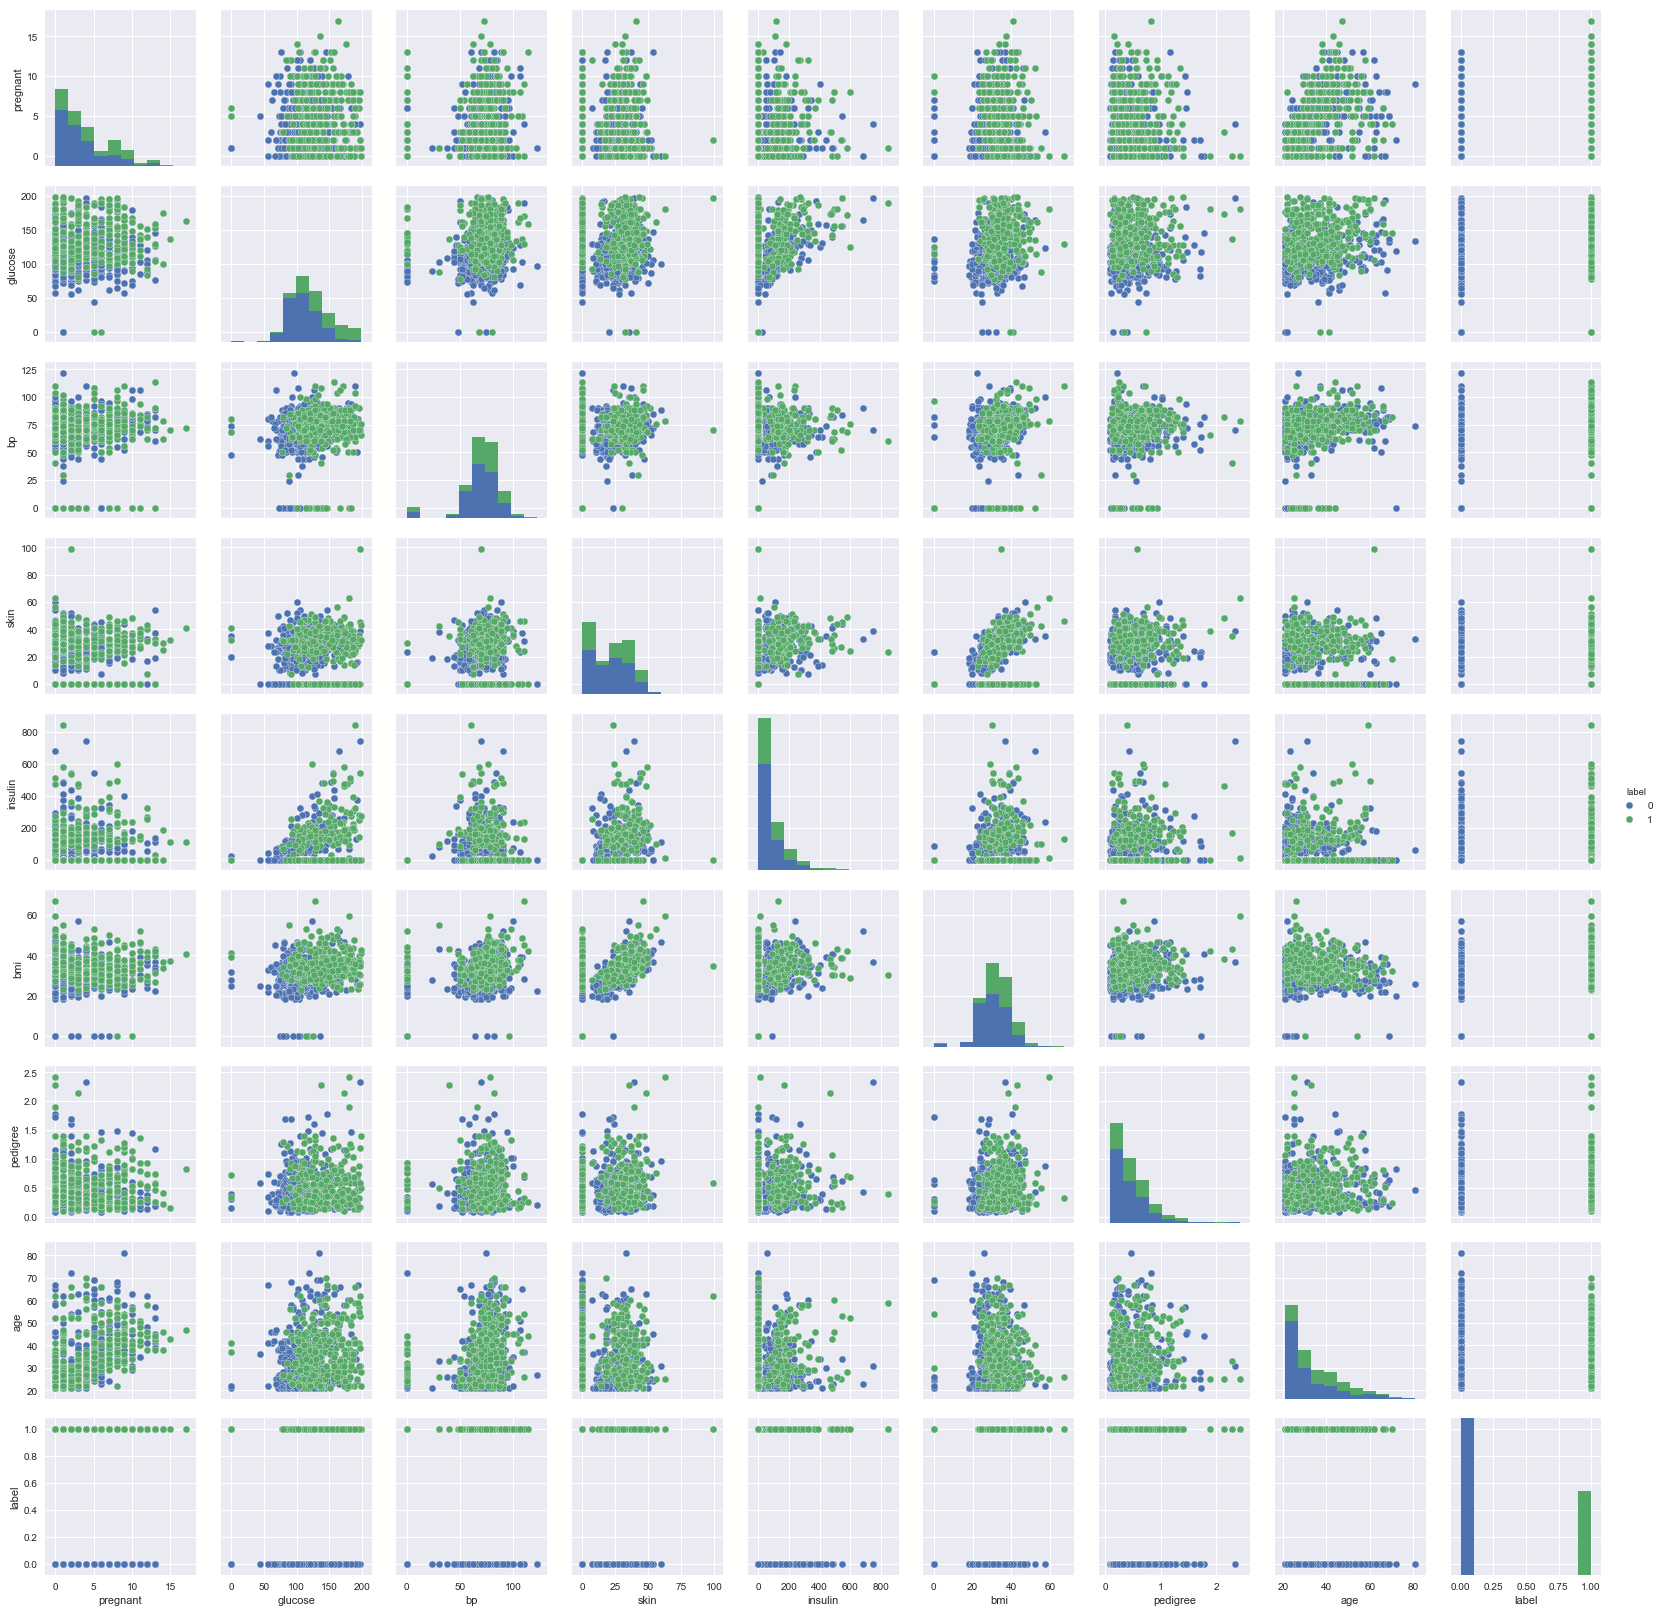

In [318]:
sns.pairplot(data=pima, hue='label')

### Adding a column

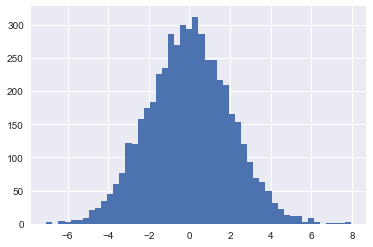

In [319]:
df['ZergSwarm'] = df.iloc[:, 1] / 2 * 4
df.loc[:, 'ZergSwarm'].hist(bins = 50)

In [320]:
df.loc[:, 'ZergSwarm'].head(9)

2017-01-04   -0.511094
2017-01-05   -1.659975
2017-01-06   -0.546505
2017-01-07    1.863572
2017-01-08   -3.241666
2017-01-09   -1.282700
2017-01-10   -0.283594
2017-01-11    2.798830
2017-01-12   -0.471368
Freq: D, Name: ZergSwarm, dtype: float64

In [321]:
df = df.drop(['ZergSwarm'], axis = 1) #drop it!

### Changing a type of a column

In [322]:
df.dtypes

1    float64
2    float64
3    float64
4    float64
dtype: object

In [323]:
df.iloc[:, 0] = df.iloc[:, 0].apply(pd.to_datetime)

In [324]:
df.dtypes

1    datetime64[ns]
2           float64
3           float64
4           float64
dtype: object

In [325]:
df.iloc[:, 1] = df.iloc[:, 1].astype(int)

In [326]:
df.dtypes

1    datetime64[ns]
2             int32
3           float64
4           float64
dtype: object

## Iteration (Loop)

In [327]:
for number, column_name in enumerate(pima.columns):
    print(str(number) + ': ' + column_name) #do something 

0: pregnant
1: glucose
2: bp
3: skin
4: insulin
5: bmi
6: pedigree
7: age
8: label
